In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('C:\\Users\\iarmi\\anaconda3\\envs\\PythonData\\lib\\site-packages') 
sys.path

['C:\\Users\\iarmi\\Data_Analytics_Bootcamp\\Module_6\\World_Weather_Analysis',
 'C:\\Users\\iarmi\\anaconda3\\python39.zip',
 'C:\\Users\\iarmi\\anaconda3\\DLLs',
 'C:\\Users\\iarmi\\anaconda3\\lib',
 'C:\\Users\\iarmi\\anaconda3',
 '',
 'C:\\Users\\iarmi\\anaconda3\\lib\\site-packages',
 'C:\\Users\\iarmi\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\iarmi\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\iarmi\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\iarmi\\anaconda3\\envs\\PythonData\\lib\\site-packages']

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-80.7813438075311 -152.34449009899865
2.0555653202528816 -152.88963969371838
16.803939269687874 28.96269162442354
51.933452359203756 148.74277931012182
-89.50565420272397 141.80601046443837
45.03111032667937 -61.263321062076514
-39.68234711187334 -51.15593639238966
50.40970597963562 58.75560865007759
86.56880935460177 164.42759269211314
-23.927752355303312 37.690857552361365
-54.04501176711922 137.9532756830502
-56.29351148418897 -114.98493027290755
-10.313575657887299 131.13578730633253
-82.90025441664588 -172.18168423947452
-32.279612231282265 120.15828436298494
-63.81222335184452 125.00470755535173
56.7047654429019 0.5385846199342836
-5.750418793681831 45.66323206521756
-0.8795047836160137 92.78135239222945
29.640778592003528 -28.186740161738385
83.99545943783346 -158.8429743008587
68.88447365404431 163.75336574539062
-62.498170660515726 105.25631897326525
-3.085897748587712 -4.358286277182856
40.66836166619942 -46.56408719404476
-55.6760209397644 50.166864470294854
1.14343638942315

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [8]:
# Import th time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Import the requests library
import requests 

# Import the API key
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | marawi
Processing Record 4 of Set 1 | vostok
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | port hawkesbury
Processing Record 7 of Set 1 | rocha
Processing Record 8 of Set 1 | khromtau
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | inhambane
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | nguiu
City not found. Skipping...
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | boddam
Processing Record 18 of Set 1 | micheweni
Processing Record 19 of Set 1 | meulaboh
Processing Record 20 of Set 1 | ponta delgada
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | cherskiy
Processing Record 23 of Set 1 | tabou
Pro

Processing Record 38 of Set 4 | san rafael
Processing Record 39 of Set 4 | turukhansk
Processing Record 40 of Set 4 | selma
Processing Record 41 of Set 4 | lavrentiya
Processing Record 42 of Set 4 | axim
Processing Record 43 of Set 4 | saint-pierre
Processing Record 44 of Set 4 | mar del plata
Processing Record 45 of Set 4 | arman
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | massaguet
Processing Record 48 of Set 4 | bartica
Processing Record 49 of Set 4 | itupiranga
Processing Record 50 of Set 4 | saint george
Processing Record 1 of Set 5 | el faiyum
City not found. Skipping...
Processing Record 2 of Set 5 | moron
Processing Record 3 of Set 5 | grand gaube
Processing Record 4 of Set 5 | norman wells
Processing Record 5 of Set 5 | salinas
Processing Record 6 of Set 5 | provideniya
Processing Record 7 of Set 5 | jinji
Processing Record 8 of Set 5 | eureka
Processing Record 9 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 10 of Set 5 | vigresta

Processing Record 23 of Set 8 | raga
Processing Record 24 of Set 8 | guerrero negro
Processing Record 25 of Set 8 | bathsheba
Processing Record 26 of Set 8 | port hedland
Processing Record 27 of Set 8 | berlevag
Processing Record 28 of Set 8 | cabra
Processing Record 29 of Set 8 | port blair
Processing Record 30 of Set 8 | sfantu gheorghe
Processing Record 31 of Set 8 | rawah
Processing Record 32 of Set 8 | san quintin
Processing Record 33 of Set 8 | maniitsoq
Processing Record 34 of Set 8 | thinadhoo
Processing Record 35 of Set 8 | churapcha
Processing Record 36 of Set 8 | saint anthony
Processing Record 37 of Set 8 | hitoyoshi
Processing Record 38 of Set 8 | roald
Processing Record 39 of Set 8 | paamiut
Processing Record 40 of Set 8 | camacha
Processing Record 41 of Set 8 | kysyl-syr
Processing Record 42 of Set 8 | putina
Processing Record 43 of Set 8 | bintulu
Processing Record 44 of Set 8 | marcona
City not found. Skipping...
Processing Record 45 of Set 8 | hinton
Processing Record

Processing Record 10 of Set 12 | usinsk
Processing Record 11 of Set 12 | bhinga
Processing Record 12 of Set 12 | washougal
Processing Record 13 of Set 12 | tura
Processing Record 14 of Set 12 | linchuan
City not found. Skipping...
Processing Record 15 of Set 12 | berdigestyakh
Processing Record 16 of Set 12 | taoudenni
Processing Record 17 of Set 12 | dohrighat
Processing Record 18 of Set 12 | bealanana
Processing Record 19 of Set 12 | arcata
Processing Record 20 of Set 12 | chuncheng
Processing Record 21 of Set 12 | cidreira
Processing Record 22 of Set 12 | emerald
Processing Record 23 of Set 12 | cavalcante
Processing Record 24 of Set 12 | itoman
Processing Record 25 of Set 12 | sitka
Processing Record 26 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 27 of Set 12 | taltal
Processing Record 28 of Set 12 | batemans bay
Processing Record 29 of Set 12 | brewster
Processing Record 30 of Set 12 | taveta
Processing Record 31 of Set 12 | kavaratti
Processing Record 32 

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-10-18 19:14:29,-46.1927,168.8643,38.34,93,71,2.01
1,Hilo,US,2022-10-18 19:14:30,19.7297,-155.0900,88.29,68,0,4.00
2,Marawi,PH,2022-10-18 19:14:30,7.9986,124.2928,69.89,94,100,1.12
3,Vostok,RU,2022-10-18 19:09:51,46.4856,135.8833,26.67,75,3,5.57
4,Hobart,AU,2022-10-18 19:12:13,-42.8794,147.3294,53.06,72,100,5.75
5,Port Hawkesbury,CA,2022-10-18 19:14:31,45.6169,-61.3485,66.96,94,100,8.05
6,Rocha,UY,2022-10-18 19:14:31,-34.4833,-54.3333,63.75,76,100,14.94
7,Khromtau,KZ,2022-10-18 19:14:31,50.2503,58.4347,38.07,70,100,10.25
8,Pevek,RU,2022-10-18 19:14:32,69.7008,170.3133,2.44,95,100,4.81
9,Inhambane,MZ,2022-10-18 19:14:32,-23.8650,35.3833,73.38,83,20,4.61


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-10-18 19:14:29,-46.1927,168.8643,38.34,93,71,2.01
1,Hilo,US,2022-10-18 19:14:30,19.7297,-155.0900,88.29,68,0,4.00
2,Marawi,PH,2022-10-18 19:14:30,7.9986,124.2928,69.89,94,100,1.12
3,Vostok,RU,2022-10-18 19:09:51,46.4856,135.8833,26.67,75,3,5.57
4,Hobart,AU,2022-10-18 19:12:13,-42.8794,147.3294,53.06,72,100,5.75
5,Port Hawkesbury,CA,2022-10-18 19:14:31,45.6169,-61.3485,66.96,94,100,8.05
6,Rocha,UY,2022-10-18 19:14:31,-34.4833,-54.3333,63.75,76,100,14.94
7,Khromtau,KZ,2022-10-18 19:14:31,50.2503,58.4347,38.07,70,100,10.25
8,Pevek,RU,2022-10-18 19:14:32,69.7008,170.3133,2.44,95,100,4.81
9,Inhambane,MZ,2022-10-18 19:14:32,-23.8650,35.3833,73.38,83,20,4.61


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

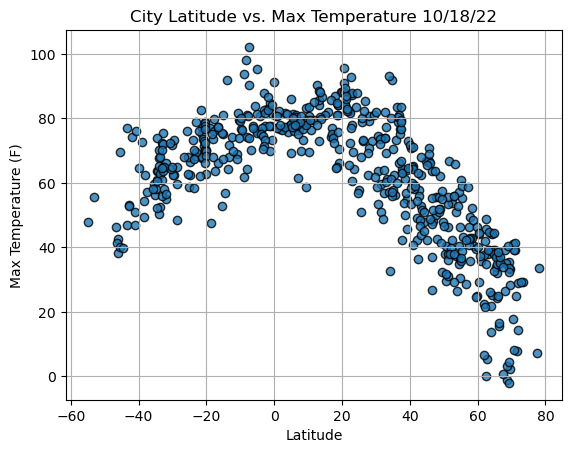

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

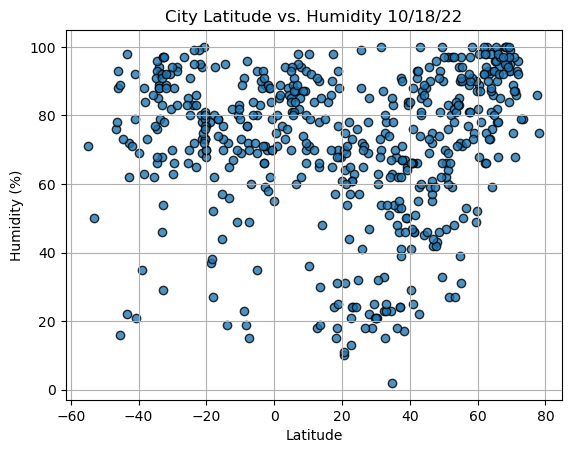

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

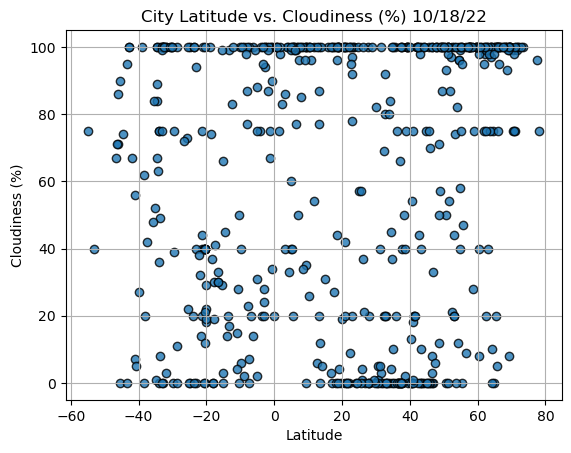

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

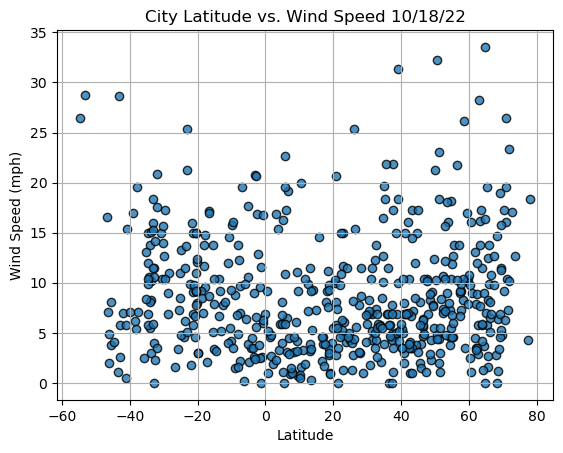

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()